In [184]:
import os
import cv2
import time
import numpy as np
from tqdm import tqdm
import gym
import copy
import matplotlib.pyplot as plt
from scipy.special import softmax
%matplotlib inline

In [291]:
def get_action_eps(obs):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[obs, :])

In [292]:
env = gym.make("FrozenLake-v0")
act_space = env.action_space.n

In [391]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
n = np.zeros([env.observation_space.n])
EPISODES = 10000
rew_list = []
step_list = []
alpha = 0.05
gamma = 0.95
epsilon = 1
T = 15
eps_list  = []
entropymu = []
entropyQ = []

for episode in tqdm(range(0, EPISODES)):
    done = False
    obs = env.reset()
    episode_rew = 0
    episode_steps = 0
    while not done:
        n[obs] += 1 
        act = get_action_eps(obs)
        new_obs, rew, done, _ = env.step(act)
        episode_rew += rew
        episode_steps += 1
        Q[obs, act] = Q[obs, act] + alpha * (rew + gamma * np.max(Q[new_obs, :]) - Q[obs, act])
        obs = new_obs
    epsilon = 0.999 * epsilon
#     epsilon = 0.1
    rew_list.append(rew)
    step_list.append(episode_steps)
    eps_list.append(epsilon)
    mu = n / np.sum(n)
    mu = [i for i in mu if i != 0]
    muQ = softmax(Q)
    if len(mu) > 10:
        entropymu.append(-np.sum(mu * np.log(mu)))
        entropyQ.append(-np.sum(muQ * np.log(muQ)))

100%|██████████| 10000/10000 [00:11<00:00, 839.42it/s]


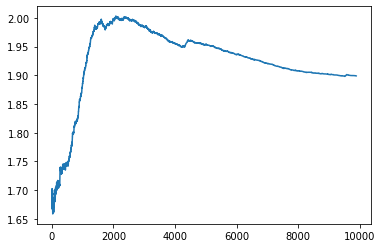

In [392]:
plt.plot(entropymu)

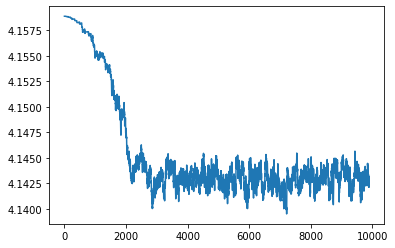

In [393]:
plt.plot(entropyQ)

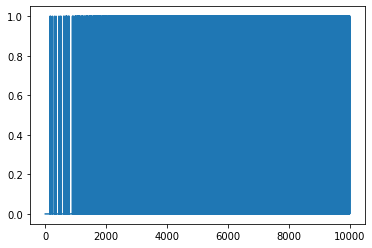

In [394]:
plt.plot(rew_list)

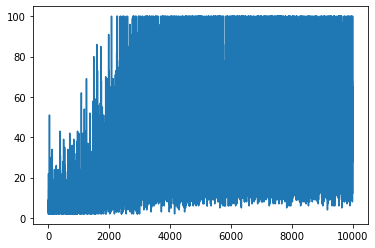

In [395]:
plt.plot(step_list)

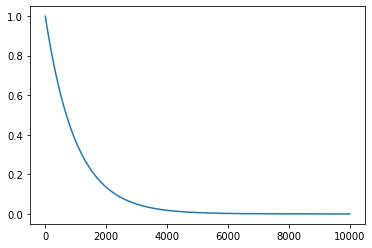

In [396]:
plt.plot(eps_list)

In [397]:
tot_per = []

for ep in tqdm(range(0, 100)):
    done = False
    obs = env.reset()
    tot_rew = 0
    while not done:
        act = np.argmax(Q[obs])
        obs, rew, done, _ = env.step(act)
        tot_rew += rew
#         env.render()
    tot_per.append(tot_rew)
np.mean(tot_per)

100%|██████████| 100/100 [00:00<00:00, 1012.70it/s]


0.76

In [398]:
Q

array([[0.18351573, 0.14605637, 0.14619738, 0.14628194],
       [0.07867024, 0.0740966 , 0.06424637, 0.15631642],
       [0.14438992, 0.10439555, 0.118191  , 0.10237329],
       [0.05410773, 0.05865661, 0.05783197, 0.10391718],
       [0.20193882, 0.12877966, 0.15470215, 0.11973081],
       [0.        , 0.        , 0.        , 0.        ],
       [0.15995083, 0.07988764, 0.08979903, 0.02903204],
       [0.        , 0.        , 0.        , 0.        ],
       [0.19189071, 0.20236637, 0.19429939, 0.27814137],
       [0.22973807, 0.36427307, 0.28706792, 0.22977414],
       [0.4357221 , 0.26752359, 0.22326139, 0.11202282],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.29637638, 0.31359131, 0.54411286, 0.31199064],
       [0.48492807, 0.78498752, 0.56686132, 0.53715903],
       [0.        , 0.        , 0.        , 0.        ]])

In [185]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG
